In [92]:
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np


# Reading and Displaying the Image

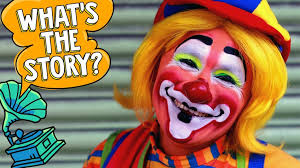

In [93]:
clown = cv.imread("/content/clown.jpeg" , -1)
cv2_imshow(clown)

# Converting it into grayscale

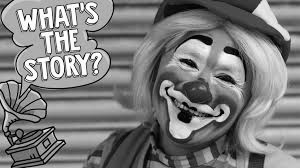

In [94]:
clownGray = cv.cvtColor(clown , cv.COLOR_BGR2GRAY)
cv2_imshow(clownGray)

# Supressing the Noise using a Gaussian Kernel

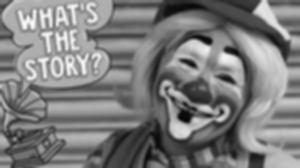

In [95]:
clownGrayGaus = cv.GaussianBlur(clownGray,(5,5), 1.5)
cv2_imshow(clownGrayGaus)

# Sobel Operator and Computing Gradient Magnitude and Orientation

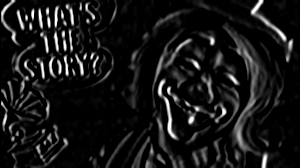

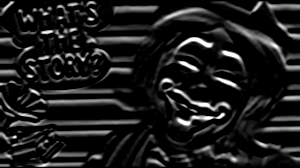

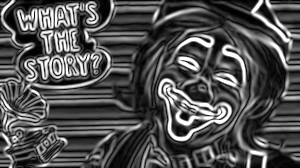

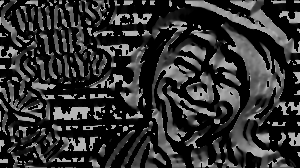

In [96]:
Gx = cv.Sobel(src= clownGrayGaus, ddepth=cv.CV_64F, dx=1, dy=0, ksize=3)
cv2_imshow(Gx)

print()
Gy = cv.Sobel(src= clownGrayGaus, ddepth=cv.CV_64F, dx=0, dy=1, ksize=3)
cv2_imshow(Gy)

print()
gradMag = np.hypot(Gx , Gy)
gradMag = gradMag
cv2_imshow(gradMag)

print()
theta = np.arctan2(Gx , Gy)*(180/np.pi)
cv2_imshow(theta)

# Non-Maxima Supression (NMS)

In [97]:
median = np.median(gradMag)
print(median)

65.29931086925804


In [98]:
def setGradMag(theta , gradMag , i , j):
  if theta == 0: # Along X Direction
    if j>0 and j<gradMag.shape[1]-1:
      if gradMag[i][j] > max(gradMag[i][j-1] ,gradMag[i][j+1]):
        pass
      else:
        gradMag[i][j] = 0
    elif j == 0:
      if gradMag[i][j] > gradMag[i][j+1]:
        pass
      else:
        gradMag[i][j] = 0
    elif j == gradMag.shape[1]-1:
      if gradMag[i][j] > gradMag[i][j-1]:
        pass
      else:
        gradMag[i][j] = 0
  if theta == 45: # Along X = Y direction
    if j>0 and j<gradMag.shape[1]-1:
      if gradMag[i][j] > max(gradMag[i+1][j-1] ,gradMag[i-1][j+1]):
        pass
      else:
        gradMag[i][j] = 0
    elif j == 0:
      if i == 0:
        pass
      else:
        if gradMag[i][j] > gradMag[i-1][j+1]:
          pass
        else:
          gradMag[i][j] = 0
    elif j == gradMag.shape[1]-1:
      if i == gradMag.shape[0]-1:
        pass
      else:
        if gradMag[i][j] > gradMag[i+1][j-1]:
          pass
        else:
          gradMag[i][j] = 0
  if theta == 90: # Along Y direction
    if i>0 and i<gradMag.shape[0]-1:
      if gradMag[i][j] > max(gradMag[i+1][j] ,gradMag[i-1][j]):
        pass
      else:
        gradMag[i][j] = 0
    elif i == 0:
      if gradMag[i][j] > gradMag[i+1][j]:
        pass
      else:
        gradMag[i][j] = 0
    elif i == gradMag.shape[0]-1:
      if gradMag[i][j] > gradMag[i-1][j]:
        pass
      else:
        gradMag[i][j] = 0
  if theta == 135: # Along X = -Y direction
    if i>0 and i<gradMag.shape[0]-1:
      if gradMag[i][j] > max(gradMag[i+1][j+1] ,gradMag[i-1][j-1]):
        pass
      else:
        gradMag[i][j] = 0
    elif i == gradMag.shape[0]-1:
      if j == 0:
        pass
      else:
        if gradMag[i][j] > gradMag[i-1][j-1]:
          pass
        else:
          gradMag[i][j] = 0
    elif i == 0:
      if j == gradMag.shape[0]-1:
        pass
      else:
        if gradMag[i][j] > gradMag[i+1][j+1]:
          pass
        else:
          gradMag[i][j] = 0

  return gradMag






In [99]:
for i in range(theta.shape[0]):
  for j in range(theta.shape[1]):
    if -22.5 <= theta[i][j] <= 22.5 or 157.5 < theta[i][j] <= 180 or -180 <= theta[i][j] < -157.5:
      img1 = setGradMag(0 , gradMag , i , j)
    elif 22.5< theta[i][j] <= 67.5 or -157.5 <= theta[i][j] < -112.5:
      img1 = setGradMag(45 , gradMag , i , j)
    elif 67.5 < theta[i][j] <= 112.5 or -112.5 <= theta[i][j] < -67.5:
      img1 = setGradMag(90 , gradMag , i , j)
    else:
      img1 = setGradMag(135 , gradMag , i , j)





Threshold Used 65.29931086925804


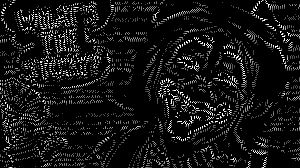

In [100]:
ii = np.where(gradMag < median)
print('Threshold Used' , median)
img1[ii] = 0
cv2_imshow(img1)

# With Standard deviation with 3

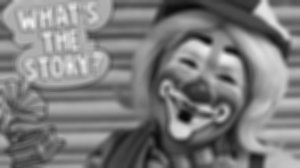

In [110]:
clownGrayGaus = cv.GaussianBlur(clownGray,(7,7), 3)
cv2_imshow(clownGrayGaus)

# Sobel Operator and Computing Gradient Magnitude and Orientation

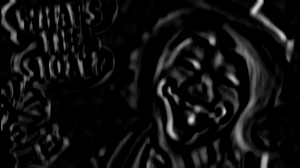

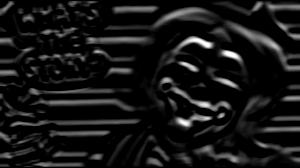

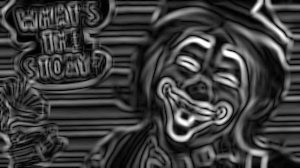

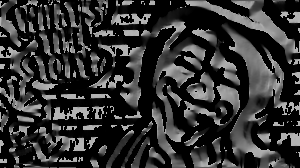

In [111]:

Gx = cv.Sobel(src= clownGrayGaus, ddepth=cv.CV_64F, dx=1, dy=0, ksize=3)
cv2_imshow(Gx)

print()
Gy = cv.Sobel(src= clownGrayGaus, ddepth=cv.CV_64F, dx=0, dy=1, ksize=3)
cv2_imshow(Gy)

print()
gradMag = np.hypot(Gx , Gy)
cv2_imshow(gradMag)

print()
theta = np.arctan2(Gx , Gy)*(180/np.pi)
cv2_imshow(theta)

In [112]:
median = np.median(gradMag)
print(median)

52.478567053607705


In [113]:
def setGradMag(theta , gradMag , i , j):
  if theta == 0:
    if j>0 and j<gradMag.shape[1]-1:
      if gradMag[i][j] > max(gradMag[i][j-1] ,gradMag[i][j+1]):
        pass
      else:
        gradMag[i][j] = 0
    elif j == 0:
      if gradMag[i][j] > gradMag[i][j+1]:
        pass
      else:
        gradMag[i][j] = 0
    elif j == gradMag.shape[1]-1:
      if gradMag[i][j] > gradMag[i][j-1]:
        pass
      else:
        gradMag[i][j] = 0
  if theta == 45:
    if j>0 and j<gradMag.shape[1]-1:
      if gradMag[i][j] > max(gradMag[i+1][j-1] ,gradMag[i-1][j+1]):
        pass
      else:
        gradMag[i][j] = 0
    elif j == 0:
      if i == 0:
        pass
      else:
        if gradMag[i][j] > gradMag[i-1][j+1]:
          pass
        else:
          gradMag[i][j] = 0
    elif j == gradMag.shape[1]-1:
      if i == gradMag.shape[0]-1:
        pass
      else:
        if gradMag[i][j] > gradMag[i+1][j-1]:
          pass
        else:
          gradMag[i][j] = 0
  if theta == 90:
    if i>0 and i<gradMag.shape[0]-1:
      if gradMag[i][j] > max(gradMag[i+1][j] ,gradMag[i-1][j]):
        pass
      else:
        gradMag[i][j] = 0
    elif i == 0:
      if gradMag[i][j] > gradMag[i+1][j]:
        pass
      else:
        gradMag[i][j] = 0
    elif i == gradMag.shape[0]-1:
      if gradMag[i][j] > gradMag[i-1][j]:
        pass
      else:
        gradMag[i][j] = 0
  if theta == 135:
    if i>0 and i<gradMag.shape[0]-1:
      if gradMag[i][j] > max(gradMag[i+1][j+1] ,gradMag[i-1][j-1]):
        pass
      else:
        gradMag[i][j] = 0
    elif i == gradMag.shape[0]-1:
      if j == 0:
        pass
      else:
        if gradMag[i][j] > gradMag[i-1][j-1]:
          pass
        else:
          gradMag[i][j] = 0
    elif i == 0:
      if j == gradMag.shape[0]-1:
        pass
      else:
        if gradMag[i][j] > gradMag[i+1][j+1]:
          pass
        else:
          gradMag[i][j] = 0

  return gradMag






In [114]:
for i in range(theta.shape[0]):
  for j in range(theta.shape[1]):
    if -22.5 <= theta[i][j] <= 22.5 or 157.5 < theta[i][j] <= 180 or -180 <= theta[i][j] < -157.5:
      img = setGradMag(0 , gradMag , i , j)
    elif 22.5< theta[i][j] <= 67.5 or -157.5 <= theta[i][j] < -112.5:
      img = setGradMag(45 , gradMag , i , j)
    elif 67.5 < theta[i][j] <= 112.5 or -112.5 <= theta[i][j] < -67.5:
      img = setGradMag(90 , gradMag , i , j)
    else:
      img = setGradMag(135 , gradMag , i , j)





Threshold Used 52.478567053607705


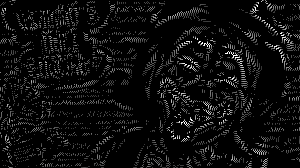

In [115]:
ii = np.where(gradMag < median)
print('Threshold Used' , median)
img[ii] = 0
cv2_imshow(img)

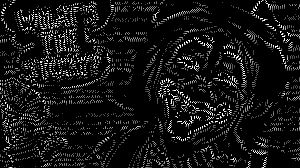

In [116]:
cv2_imshow(img1)

# How does the final output differ from that of the previous question?

As expected we can see that, a lot of edges has been lost as we have increased sigma to 3 or their strength has been reduced